<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import seaborn as sns
import sklearn.metrics as sm

def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error

dataset = pd.read_excel("/content/DATA SET.xlsx")#.iloc[2:,:].reset_index(drop = True)

In [69]:
dataset

,Fabric Type,Cotton%,Polyester%,Spandex%,Cotton Count,Polyester Count,Spandex Count,Cotton SL,Polyester SL,Spandex SL,F/Dia,F/GSM,Color Range,Length Shrinkage%,Width Shrinkage%,Spirality,MC Dia,MC Gauge
0,TERRY,100,0,0,24,0.00,0.00,2.9,0.00,0.0,70,240,Light,-2.0,-5.0,2.4,32,24
1,TERRY,100,0,0,24,0.00,0.00,2.9,0.00,0.0,66,240,Light,-3.0,-4.3,0.5,30,24
2,TERRY,100,0,0,24,0.00,0.00,2.9,0.00,0.0,70,240,Light,-6.1,-3.0,0.5,32,24
3,TERRY,100,0,0,24,0.00,0.00,2.9,0.00,0.0,66,240,Light,-5.6,-4.3,2.3,30,24
4,TERRY,70,30,0,32,70.86,0.00,4.5,1.65,0.0,72,280,White,-2.5,-6.0,3.5,30,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,RIB,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,Average,-4.1,-8.0,5.0,40,18
90,RIB,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,Black,-1.3,-11.0,5.0,40,18
91,RIB,95,0,5,34,0.00,177.15,"2,9",0.00,1.3,50,240,Wash,-3.0,-5.0,4.5,42,18
92,RIB,95,0,5,34,0.00,177.15,2.9,0.00,1.3,50,240,Wash,-3.5,-4.0,2.0,42,18


In [16]:
dataset.shape

(88, 11)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     object 
 1   M/C Dia (Output)    88 non-null     float64
 2   M/C gauge (Output)  88 non-null     float64
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     float64
 6   Finish GSM          88 non-null     float64
 7   Color Range         88 non-null     object 
 8   Shrinkage (%/mm)    88 non-null     object 
 9   Column1             88 non-null     object 
 10  Twist               88 non-null     float64
dtypes: float64(7), object(4)
memory usage: 7.7+ KB


In [24]:
dataset["Shrinkage (%/mm)"] = dataset["Shrinkage (%/mm)"].astype(float)
dataset["Column1"] = dataset["Column1"].astype(float)

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Type"]=encoder.fit_transform(dataset["Type"])
dataset["Color Range"]=encoder.fit_transform(dataset["Color Range"])

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                88 non-null     int64  
 1   M/C Dia (Output)    88 non-null     float64
 2   M/C gauge (Output)  88 non-null     float64
 3   Yarn Count          88 non-null     float64
 4   Stich Length        88 non-null     float64
 5   Finish Dia          88 non-null     float64
 6   Finish GSM          88 non-null     float64
 7   Color Range         88 non-null     int64  
 8   Shrinkage (%/mm)    88 non-null     float64
 9   Column1             88 non-null     float64
 10  Twist               88 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 7.7 KB


#Regression Model for `M/C Dia (Output)`

In [19]:
list(dataset.columns)

['Type',
 'M/C Dia (Output)',
 'M/C gauge (Output)',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage (%/mm)',
 'Column1',
 'Twist']

In [27]:
feature_columns = ['Type',
 'Yarn Count',
 'Stich Length',
 'Finish Dia',
 'Finish GSM',
 'Color Range',
 'Shrinkage (%/mm)',
 'Column1',
 'Twist']

X = dataset.loc[:,feature_columns]
y = dataset['M/C Dia (Output)']

In [28]:
X

,Type,Yarn Count,Stich Length,Finish Dia,Finish GSM,Color Range,Shrinkage (%/mm),Column1,Twist
0,12,24.0,2.90,70.0,240.0,3,2.0,5.0,2.4
1,12,24.0,2.90,66.0,240.0,3,3.0,4.3,0.5
2,12,24.0,2.90,70.0,240.0,3,6.1,3.0,0.5
3,12,24.0,2.90,66.0,240.0,3,5.6,4.3,2.3
4,1,30.0,3.05,60.0,260.0,3,3.7,5.0,0.5
...,...,...,...,...,...,...,...,...,...
83,5,28.0,2.62,76.0,225.0,0,-4.1,-8.0,5.0
84,5,28.0,2.62,76.0,225.0,1,-1.3,-11.0,5.0
85,5,34.0,2.90,50.0,240.0,6,-3.0,-5.0,4.5
86,5,34.0,2.90,50.0,240.0,6,-3.5,-4.0,2.0


In [29]:
y

0     32.0
1     30.0
2     32.0
3     30.0
4     26.0
      ... 
83    40.0
84    40.0
85    42.0
86    42.0
87    34.0
Name: M/C Dia (Output), Length: 88, dtype: float64

In [31]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)




---



In [32]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [65]:
# Assuming X is your feature matrix and y is your target variable
regressor = LinearRegression()
regressor.fit(X_train, y_train)


pred_train= regressor.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= regressor.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

# Get the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

Trainng Result
Mean absolute error = 2.58
Mean squared error = 10.84
Median absolute error = 1.88
Explain variance score = 0.55
R2 score = 0.55

Trainng Result
Mean absolute error = 2.43
Mean squared error = 11.31
Median absolute error = 1.56
Explain variance score = 0.43
R2 score = 0.21


#Decision Trees

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [66]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

Trainng Result
Mean absolute error = 1.14
Mean squared error = 2.47
Median absolute error = 0.67
Explain variance score = 0.9
R2 score = 0.9

Trainng Result
Mean absolute error = 1.17
Mean squared error = 2.59
Median absolute error = 1.0
Explain variance score = 0.82
R2 score = 0.82


In [ ]:

"""for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)"""

#Random Forest (or Bootstrap Aggregation)

In [42]:
#RF model
model_rf = RandomForestRegressor(n_estimators=700, oob_score=True)
model_rf.fit(X_train, y_train)

print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.4
Mean squared error = 0.5
Median absolute error = 0.21
Explain variance score = 0.98
R2 score = 0.98
Testing
Mean absolute error = 0.95
Mean squared error = 2.21
Median absolute error = 0.49
Explain variance score = 0.87
R2 score = 0.84


In [ ]:
"""
for i in range(700,3000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)"""

#Polynomial Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)



print("Training")
pred_train= lin2.predict(X_poly_train)
res(y_train,pred_train)

print("Testing")
X_poly_test = poly.fit_transform(X_test)
pred_test= lin2.predict(X_poly_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 4.78
Mean squared error = 95.99
Median absolute error = 2.27
Explain variance score = -5.25
R2 score = -5.75


#Kernel Ridge

In [45]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
pred_train= krr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 2.54
Mean squared error = 10.92
Median absolute error = 1.8
Explain variance score = 0.55
R2 score = 0.55
Testing
Mean absolute error = 2.47
Mean squared error = 11.79
Median absolute error = 1.31
Explain variance score = 0.37
R2 score = 0.17


#SVM

In [46]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 2.33
Mean squared error = 9.65
Median absolute error = 2.26
Explain variance score = 0.61
R2 score = 0.6
Testing
Mean absolute error = 2.16
Mean squared error = 7.75
Median absolute error = 2.02
Explain variance score = 0.61
R2 score = 0.45


#Lasso

In [49]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 2.6
Mean squared error = 10.85
Median absolute error = 1.92
Explain variance score = 0.55
R2 score = 0.55
Testing
Mean absolute error = 2.43
Mean squared error = 11.01
Median absolute error = 1.68
Explain variance score = 0.45
R2 score = 0.23


#ANN Regression

Text(0.5, 1.0, 'ST-II Max-Min Difference')

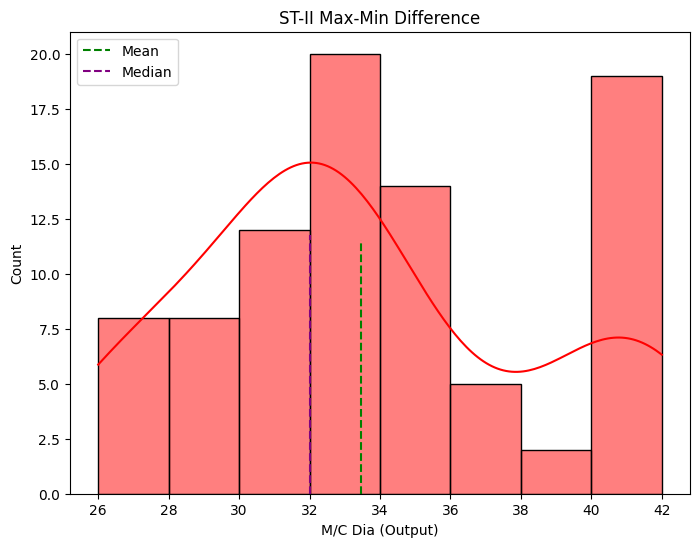

In [53]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset,x="M/C Dia (Output)",color="red",kde=True)
plt.axvline(x=dataset["M/C Dia (Output)"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=dataset["M/C Dia (Output)"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("SomeThing")

Text(0.5, 1.0, 'Cumulative of the Target Column')

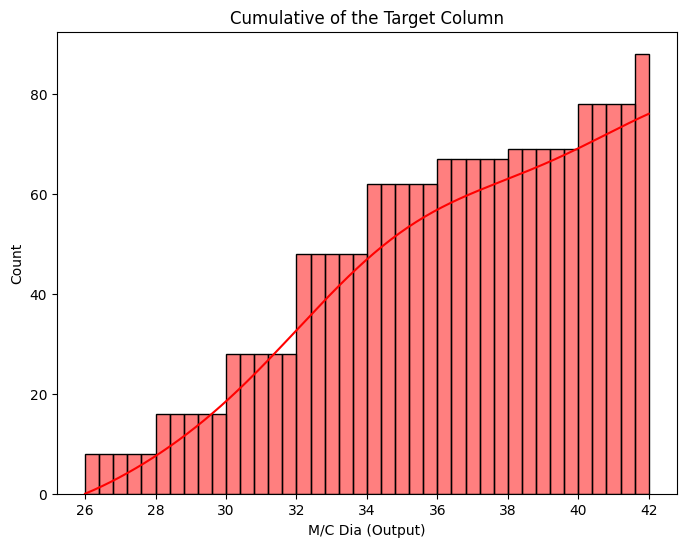

In [54]:
plt.figure(figsize = (8,6))
sns.histplot(dataset["M/C Dia (Output)"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Epoch 1/100
2/2 [==============================] - 1s 203ms/step - loss: 428.0425 - val_loss: 339.7379
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 394.0060 - val_loss: 313.2433
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 361.8609 - val_loss: 287.8890
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 329.8255 - val_loss: 261.3874
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 298.2672 - val_loss: 233.5076
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 266.4003 - val_loss: 205.7217
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 233.5054 - val_loss: 176.9711
Epoch 8/100
2/2 [==============================] - 0s 34ms/step - loss: 200.7557 - val_loss: 150.5993
Epoch 9/100
2/2 [==============================] - 0s 33ms/step - loss: 171.0940 - val_loss: 127.4620
Epoch 10/100
2/2 [==============================] - 0s 32ms/step - loss: 143.6222

<Axes: >

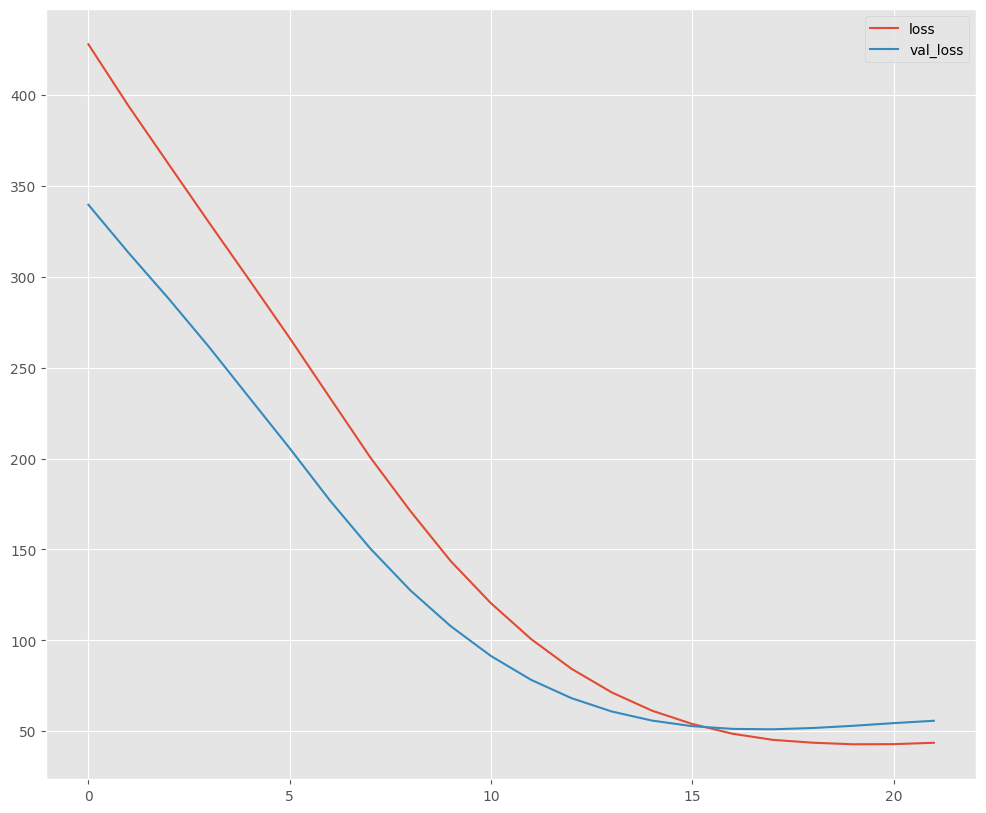

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

#pd.DataFrame(ann.history.history)

plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))


In [60]:
print("Training")
pred_train= ann.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= ann.predict(X_test)
res(y_test,pred_test)

Training
3/3 [==============================] - 0s 4ms/step
Mean absolute error = 5.45
Mean squared error = 44.09
Median absolute error = 4.51
Explain variance score = -0.78
R2 score = -0.81
Testing
1/1 [==============================] - 0s 25ms/step
Mean absolute error = 6.34
Mean squared error = 55.73
Median absolute error = 6.34
Explain variance score = -2.73
R2 score = -2.92
